In [79]:
# Importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import NearMiss
from scipy import stats

%matplotlib inline

In [80]:
df = pd.read_csv('Data/bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [81]:
# Looking at statistics of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [82]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [83]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [84]:
Y = (df['y'] == 'yes')*1

In [85]:
Y.unique()

array([0, 1], dtype=int32)

In [86]:
# df.drop('y', axis = 1, inplace = True)

In [87]:
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

### Exploratory Data Analysis
    1. Visualizing some of the parameters as to how they are distributed. 

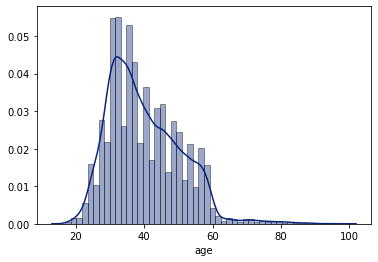

In [88]:
# Visaulizing age in the dataset
sns.distplot(df['age'], hist = True, color = "#07247D", hist_kws = {'edgecolor':'black'})

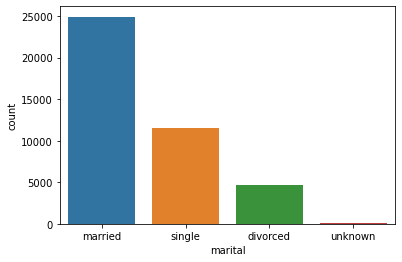

In [89]:
# Visualizing the marital status
sns.countplot(df['marital'])

In [90]:
# checking number of categories in education
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

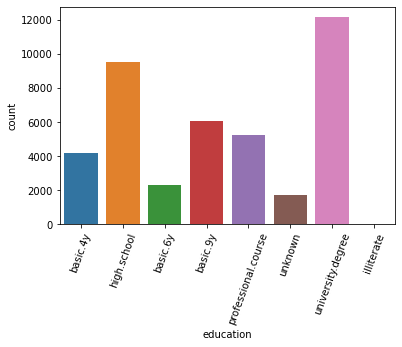

In [91]:
# Visualizing count of education
fig_edu = sns.countplot(x = 'education', data = df)
fig_edu.set_xticklabels(fig_edu.get_xticklabels(), rotation=70)

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

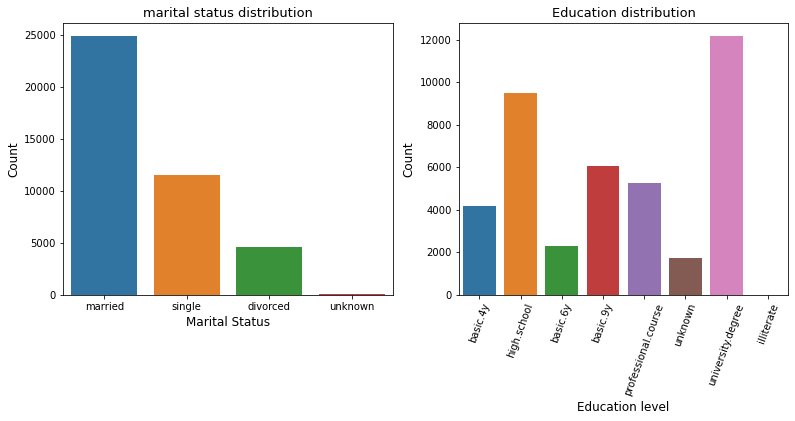

In [92]:
# Visualizing the above two using subplots
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

# First plot for marital status
sns.countplot(x = "marital", data = df, ax = ax1)
ax1.set_title("marital status distribution", fontsize = 13)
ax1.set_xlabel("Marital Status", fontsize = 12)
ax1.set_ylabel("Count", fontsize = 12)

# Second plot for Education distribution
sns.countplot(x = "education", data = df, ax = ax2)
ax2.set_title("Education distribution", fontsize = 13)
ax2.set_xlabel("Education level", fontsize = 12)
ax2.set_ylabel("Count", fontsize = 12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 70)

### Visualizing how JOBS are distribution

Text(0.5, 1.0, 'Job Count Distribution')

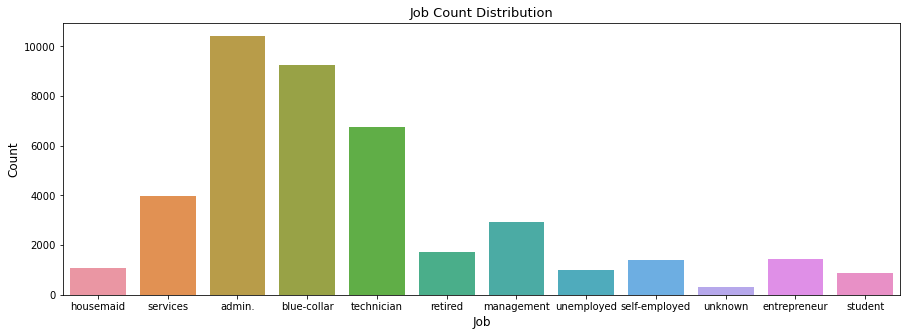

In [93]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
sns.countplot(x = "job", data = df)
ax.set_xlabel('Job', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
ax.set_title("Job Count Distribution", fontsize = 13)

### Housing and Loan Distribution

1. Checking how Housing Loans and Personal Loans are distributed. 

Text(0, 0.5, 'Count')

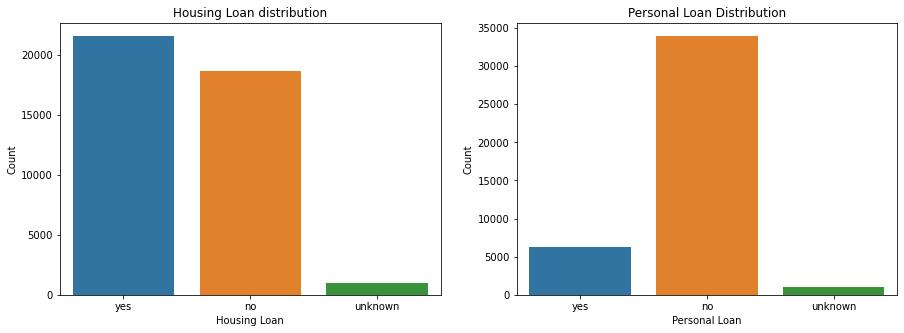

In [94]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
sns.countplot(x = "housing", data = df, ax = ax1, order = ['yes', 'no', 'unknown'])
ax1.set_title("Housing Loan distribution")
ax1.set_xlabel("Housing Loan")
ax1.set_ylabel("Count")

sns.countplot(x = "loan", data = df, ax = ax2, order = ['yes', 'no', 'unknown'])
ax2.set_title("Personal Loan Distribution")
ax2.set_xlabel("Personal Loan")
ax2.set_ylabel("Count")

In [95]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Getting total count 
Getting count of number of Defaulters, people with Housing loan and Personal loan

Credit Defaulter

In [96]:
print("Number of people with credit default: ", df[df['default'] == 'yes']['default'].count())
print("Number of people with no credit default: ", df[df['default'] == 'no']['default'].count())
print("Number of people who's credit default is unknown: ", df[df['default'] == 'unknown']['default'].count())

Number of people with credit default:  3
Number of people with no credit default:  32588
Number of people who's credit default is unknown:  8597


Housing Loan

In [97]:
print("Number of people with Housing loan: ", df[df['housing'] == 'yes']['housing'].count())
print("Number of people with no Housing loan: ", df[df['housing'] == 'no']['housing'].count())
print("Number of people who's Housing loan is unknown: ", df[df['housing'] == 'unknown']['housing'].count())

Number of people with Housing loan:  21576
Number of people with no Housing loan:  18622
Number of people who's Housing loan is unknown:  990


Personal Loan

In [98]:
print("Number of people with Personal loan: ", df[df['loan'] == 'yes']['loan'].count())
print("Number of people with no Personal loan: ", df[df['loan'] == 'no']['loan'].count())
print("Number of people who's Personal loan is unknown: ", df[df['loan'] == 'unknown']['loan'].count())

Number of people with Personal loan:  6248
Number of people with no Personal loan:  33950
Number of people who's Personal loan is unknown:  990


### Visualisation related to "Last Contact of the Current Campain" 

<i> Visualisation related to Duration </i>

Plotting duration using boxplot makes it difficult to obtain some important values like average of distribution and so I am plotting histogram on the side to see how its distributed and check for mean value (If its possible). 

Text(0.5, 1.0, 'Call Duration vs Count')

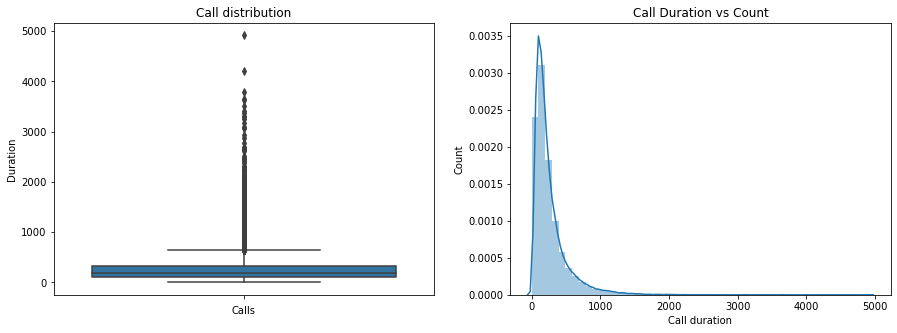

In [99]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.boxplot(x = "duration", data = df, orient = 'v', ax = ax1)
ax1.set_xlabel("Calls")
ax1.set_ylabel("Duration")
ax1.set_title("Call distribution")

sns.distplot(df['duration'], ax = ax2)
ax2.set_xlabel("Call duration")
ax2.set_ylabel("Count")
ax2.set_title("Call Duration vs Count")

Getting all the Mean, Standard Diveation, Minimum and Maximum values for duration  

In [100]:
min_duration = df['duration'].min()
max_duration = df['duration'].max()
median_duration = df['duration'].mean()
standard_dev_duration = df["duration"].std()

print("Min call duration: ", min_duration)
print("Max call duration: ", max_duration)
print("Median call duration: ", round(median_duration, 2))
print("Standard diveation in call duration: ", round(standard_dev_duration, 2))

Min call duration:  0
Max call duration:  4918
Median call duration:  258.29
Standard diveation in call duration:  259.28


We can see from the box plot that most call duration is around the mean so finding the interquartile range will help us in understanding how long the call might last

In [101]:
first_quartile = df['duration'].quantile(q = 0.25)
second_quartile = df['duration'].quantile(q = 0.50)
third_quartile = df['duration'].quantile(q = 0.75)
fourth_quartile = df['duration'].quantile(q = 1)
IRQ = third_quartile - second_quartile

print("Second Quartile: ", second_quartile)
print("Third Quartile: ", third_quartile)
print("Inter quartile range(range within which most data is present): ",IRQ)

Second Quartile:  180.0
Third Quartile:  319.0
Inter quartile range(range within which most data is present):  139.0


 <i> Visualisation related to "Contact, Month and Day of the week" </i>

Text(0.5, 1.0, 'Count of Calls made on Days of the week')

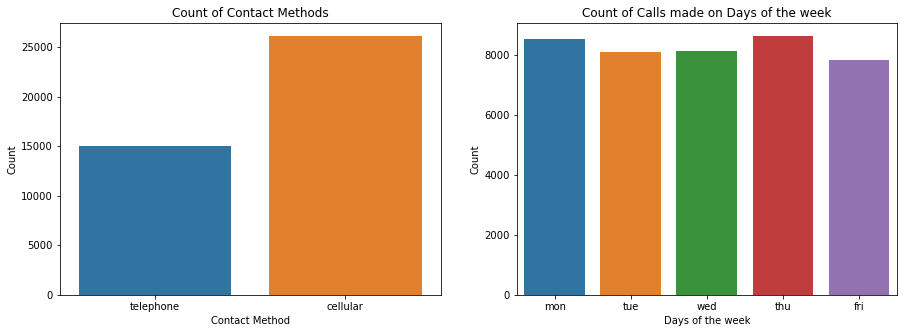

In [102]:
# For contact and Days of the week
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.countplot(x = 'contact', data = df, ax = ax1)
ax1.set_xlabel("Contact Method")
ax1.set_ylabel("Count")
ax1.set_title("Count of Contact Methods")

sns.countplot(df['day_of_week'], ax = ax2)
ax2.set_xlabel("Days of the week")
ax2.set_ylabel("Count")
ax2.set_title("Count of Calls made on Days of the week")


Text(0.5, 1.0, 'Count of contacts made in each month')

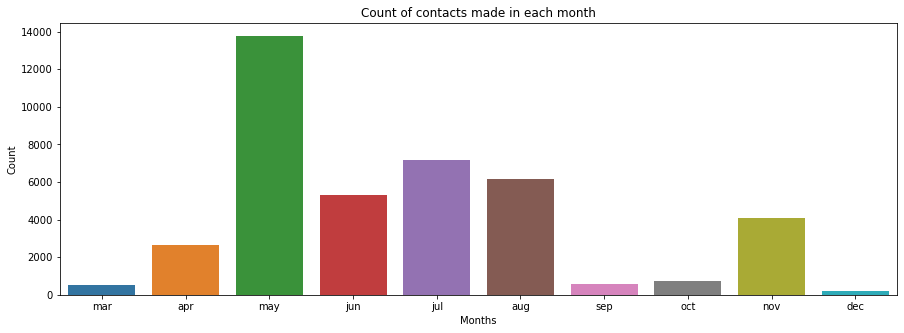

In [103]:
# For Months
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'month', data = df, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax.set_xlabel("Months")
ax.set_ylabel("Count")
ax.set_title("Count of contacts made in each month")

In [104]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Finding the average duration of call with people holding different jobs

Text(0.5, 1.0, 'log(Duration) vs Jobs')

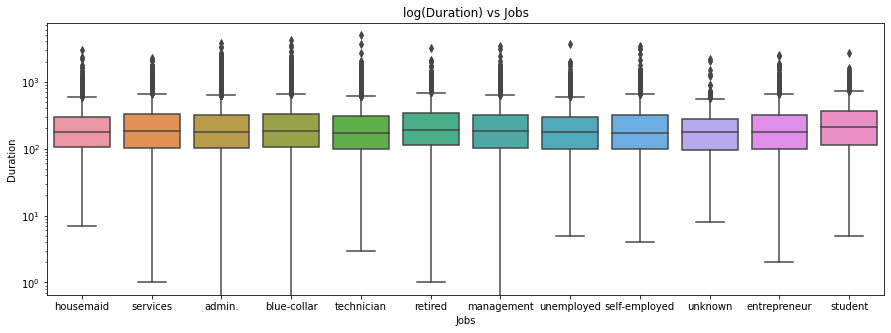

In [105]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "job", y = "duration", data = df, orient = 'v')
ax.set_xlabel("Jobs")
ax.set_ylabel("Duration")
ax.set_yscale("log")
ax.set_title("log(Duration) vs Jobs")

Checking if there is a relation between average duration of call and eduacation 

Text(0.5, 1.0, 'log(Duration) vs Education')

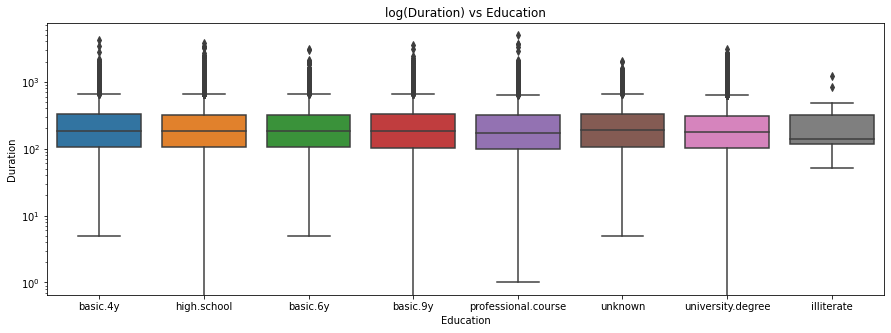

In [106]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "education", y = "duration", data = df, orient = 'v')
ax.set_xlabel("Education")
ax.set_ylabel("Duration")
ax.set_yscale("log")
ax.set_title("log(Duration) vs Education")

## 2. Categorical Treatment

In [29]:
print("Jobs: \n", df["job"].unique(),'\n')
print("Marital Status: \n", df['marital'].unique(),'\n')
print("Education: \n", df['education'].unique(),'\n')
print("Default on Credit: \n", df['default'].unique(),'\n')
print("Housing loan: \n", df['housing'].unique(),'\n')
print("Loan default: \n", df['loan'].unique(),'\n')
print("Contact type: \n", df['contact'].unique(),'\n')
print("Months: \n", df['month'].unique(),'\n')
print("day_of_week: \n", df['day_of_week'].unique(),'\n')
print("Poutcome: \n",df["poutcome"].unique(),'\n')

Jobs: 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

Marital Status: 
 ['married' 'single' 'divorced' 'unknown'] 

Education: 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

Default on Credit: 
 ['no' 'unknown' 'yes'] 

Housing loan: 
 ['no' 'yes' 'unknown'] 

Loan default: 
 ['no' 'yes' 'unknown'] 

Contact type: 
 ['telephone' 'cellular'] 

Months: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week: 
 ['mon' 'tue' 'wed' 'thu' 'fri'] 

Poutcome: 
 ['nonexistent' 'failure' 'success'] 



#### Creating label encoders to treat all categorical variables

In [30]:
labelencoder_X = LabelEncoder()

In [31]:
df["job"] = labelencoder_X.fit_transform(df["job"])
df["marital"] = labelencoder_X.fit_transform(df["marital"])
df["education"] = labelencoder_X.fit_transform(df["education"])
df["default"] = labelencoder_X.fit_transform(df["default"])
df["housing"] = labelencoder_X.fit_transform(df["housing"])
df["loan"] = labelencoder_X.fit_transform(df["loan"])
df["contact"] = labelencoder_X.fit_transform(df["contact"])
df["month"] = labelencoder_X.fit_transform(df["month"])
df["day_of_week"] = labelencoder_X.fit_transform(df["day_of_week"])
df["poutcome"] = labelencoder_X.fit_transform(df["poutcome"])

In [32]:
# For dataframes to display all the columns in the output
pd.set_option('max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
df['y'] = Y

## 3. Undersampling and Feature Engineering

##### 3.1 Undersampling

In [34]:
df[df['y'] == 1].shape

(4640, 21)

From the above output we can see that out of 41k odd entries, we have only 4640 positive instances. Out data is imballenced.

#### Dealing with imballenced dataset

We can see that the data is imballenced so the output of the model will be biased. One way to move forward is:
1. Undersample the data
2. Oversample the data

In [35]:
# There are three types of undersample that we can use. I will be using version 3 for undersampling
undersample = NearMiss(version=1)

In [36]:
# Preparing the dataframe to be fed into undersample
df_x = df.iloc[:,:-1]
df_y = df['y']

In [37]:
# Getting out new data
X, y = undersample.fit_resample(df_x, df_y)

In [38]:
# Adding output column back to X to perform feature selection
X['y'] = y
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,29,0,1,6,0,2,2,0,0,1,245,1,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
1,24,8,2,3,0,2,0,0,0,2,209,1,999,0,1,-1.8,93.075,-47.1,1.365,5099.1,0
2,48,1,1,1,0,2,0,1,6,2,604,1,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
3,35,9,1,6,0,0,0,0,1,0,224,3,999,0,1,-2.9,92.201,-31.4,0.869,5076.2,0
4,34,1,1,2,1,0,0,0,6,2,728,2,999,0,1,-1.8,92.893,-46.2,1.327,5099.1,0


##### 3.2 Feature Selection

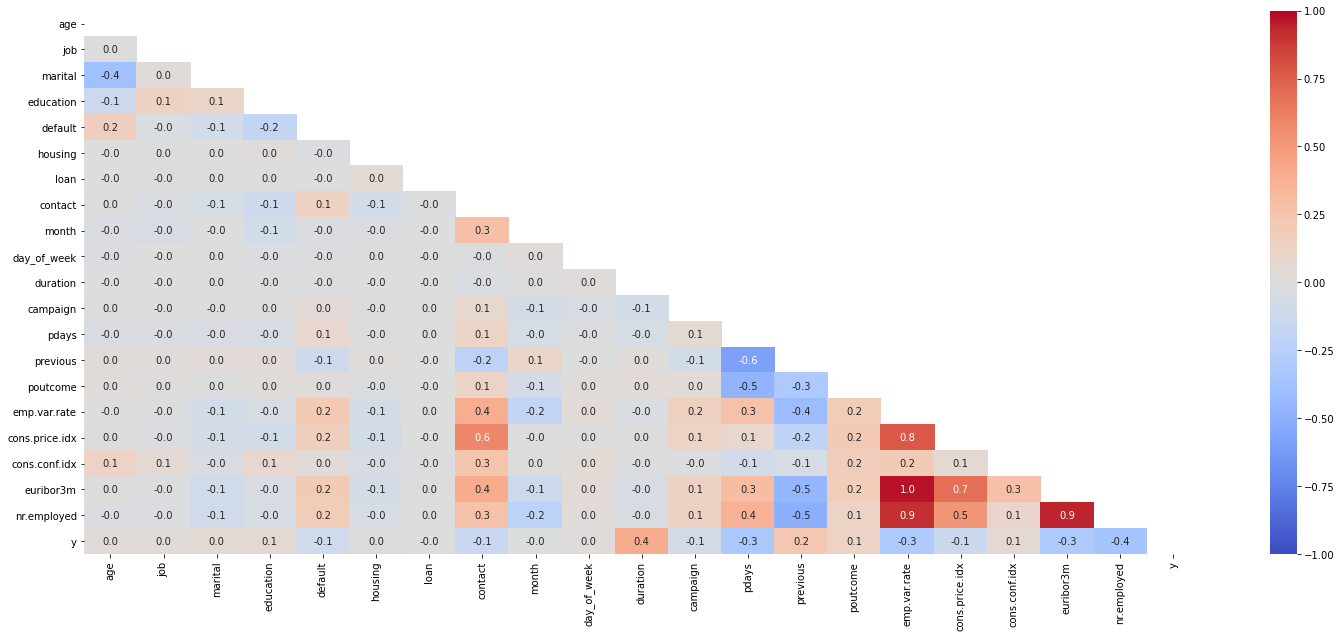

In [39]:
# Generate correlation matrix heat map to check which feature has greatest influence on the output 
fig, ax = plt.subplots(figsize = (25, 10))
matrix = np.triu(X.corr())
sns.heatmap(df.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

Output has a good correlation with duration, pdays, emp.var.rate, euribor3m and nr.employed. Therefore they might form a very good features compared to others.
We should also note that emp.var.rate has a high correlation with nr.employed, euribor3m and cons.price.idx. So we might need to consider this while selecting our features.

In [40]:
# Checking to see if any categorical variables have direct relationship with y

for i in ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]:
    print("Results for categorical variable {} is:\n".format(i))
    print(X.groupby(i)['y'].mean())

Results for categorical variable job is:

job
0     0.509804
1     0.344121
2     0.397436
3     0.569892
4     0.463277
5     0.869739
6     0.455657
7     0.391515
8     0.712435
9     0.565015
10    0.738462
11    0.840909
Name: y, dtype: float64
Results for categorical variable marital is:

marital
0    0.552204
1    0.500692
2    0.485612
3    0.480000
Name: y, dtype: float64
Results for categorical variable education is:

education
0    0.618497
1    0.464198
2    0.366383
3    0.452988
4    0.800000
5    0.527950
6    0.536460
7    0.676550
Name: y, dtype: float64
Results for categorical variable default is:

default
0    0.511954
1    0.409427
Name: y, dtype: float64
Results for categorical variable housing is:

housing
0    0.509173
1    0.471366
2    0.494088
Name: y, dtype: float64
Results for categorical variable loan is:

loan
0    0.500325
1    0.471366
2    0.502946
Name: y, dtype: float64
Results for categorical variable contact is:

contact
0    0.491391
1    0.546908


From the above output we cant come to any conclusion but one thing we can observe is that in poutcome, when the value is '2', there is 72.5% positive outcome.

In [41]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

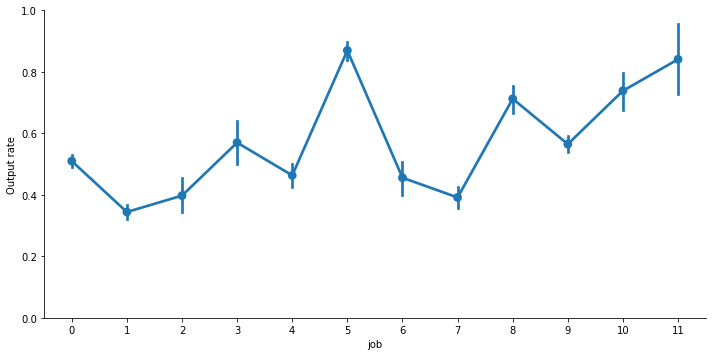

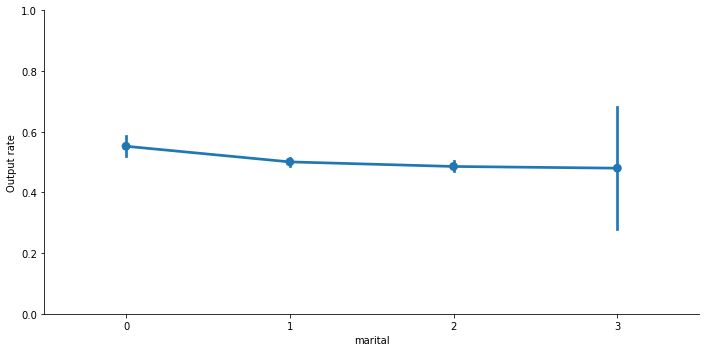

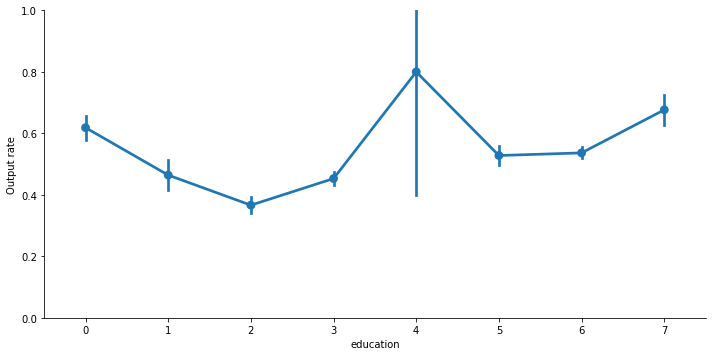

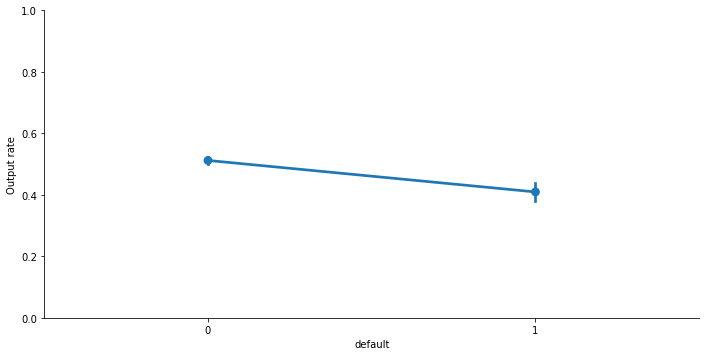

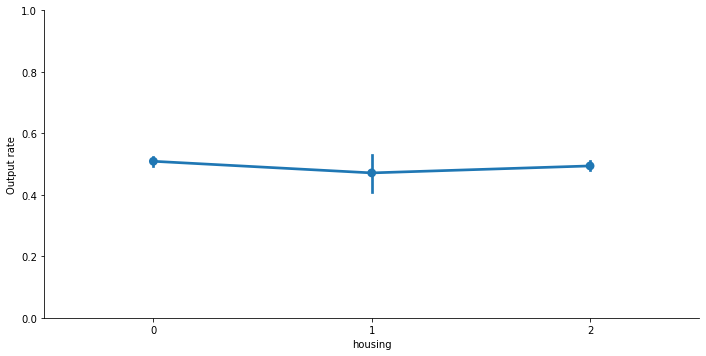

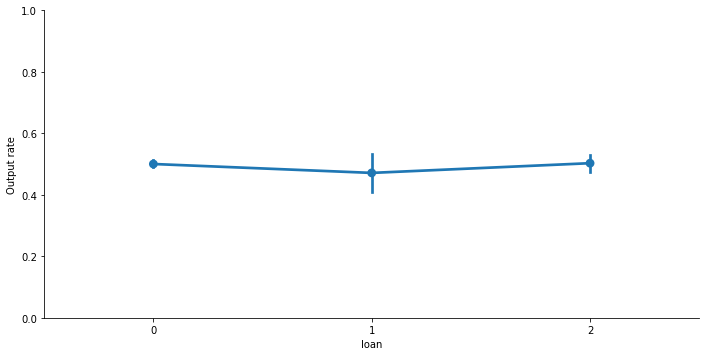

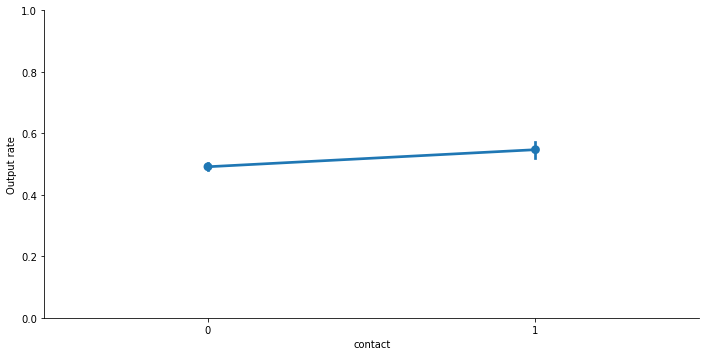

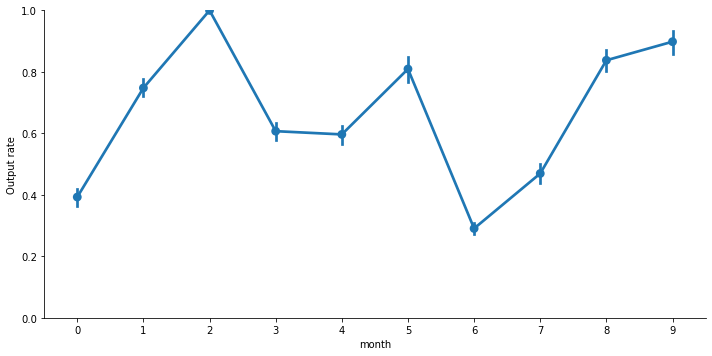

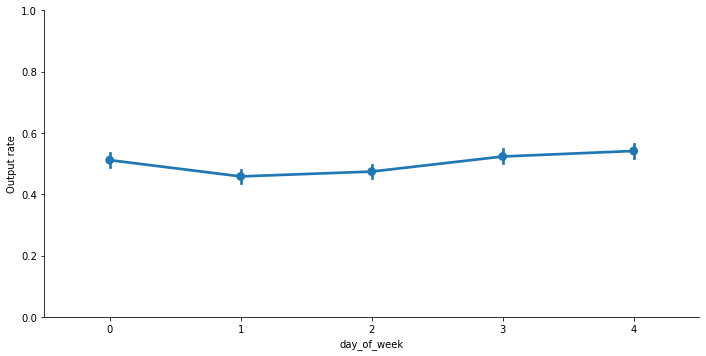

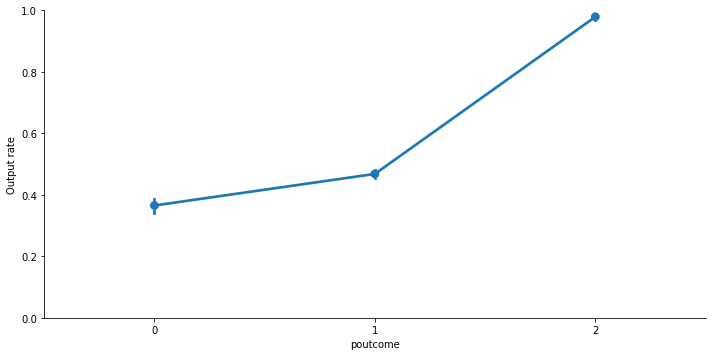

In [42]:
# Generate categorical plots for features
X.rename(columns={'y':'Output rate'}, inplace=True)
for col in ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]:
    sns.catplot(x=col, y='Output rate', data=X, kind='point', aspect=2, )
    plt.ylim(0, 1)
X.rename(columns={'Output rate':'y'}, inplace = True)

From the above graphs we can see that Housing and loan remains almost constant and dont have much if an effect. So probably we can elemenate them. Lets perform statistical tests to determine that.

In [43]:
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(X.groupby('y')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    survived = X[X['y']==1][feature]
    not_survived = X[X['y']==0][feature]
    tstat, pval = stats.ttest_ind(survived, not_survived, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [44]:
for feature in ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']:
    describe_cont_feature(feature)


*** Results for age ***
    count       mean        std   min   25%   50%    75%   max
y                                                             
0  4640.0  35.410560   7.538546  18.0  30.0  34.0  38.25  88.0
1  4640.0  40.913147  13.837476  17.0  31.0  37.0  50.00  98.0
t-statistic: 23.8, p-value: 1.93e-120
None

*** Results for job ***
    count      mean       std  min  25%  50%  75%   max
y                                                      
0  4640.0  3.187931  3.374202  0.0  0.0  1.0  7.0  11.0
1  4640.0  3.978017  3.642749  0.0  0.0  4.0  8.0  11.0
t-statistic: 10.8, p-value: 3.29e-27
None

*** Results for marital ***
    count      mean       std  min  25%  50%  75%  max
y                                                     
0  4640.0  1.292241  0.615549  0.0  1.0  1.0  2.0  3.0
1  4640.0  1.251724  0.631498  0.0  1.0  1.0  2.0  3.0
t-statistic: -3.1, p-value: 0.00176
None

*** Results for education ***
    count      mean       std  min  25%  50%  75%  max
y            

From the above output, we can see that age, housing and month have p-value greater than 0.5 therefore we can eleminate them as they fail null hypothesis.

## 4. Building Machine Learning Models

In [45]:
# Importing necessary libraries required for Machine learning model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# Seperating X and Y variables for fitting the model
y = X.iloc[:,-1]
X = X.iloc[:,:-1]

In [47]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [48]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9275    1
9276    1
9277    1
9278    1
9279    1
Name: y, Length: 9280, dtype: int32

In [49]:
# Dropping the columns after doing feature scaling
X = X.drop(["age","job", "housing", "month", "loan", "campaign"], axis = 1)

In [50]:
X.head()

,marital,education,default,contact,day_of_week,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,6,0,0,1,245,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
1,2,3,0,0,2,209,999,0,1,-1.8,93.075,-47.1,1.365,5099.1
2,1,1,0,1,2,604,999,0,1,1.1,93.994,-36.4,4.855,5191.0
3,1,6,0,0,0,224,999,0,1,-2.9,92.201,-31.4,0.869,5076.2
4,1,2,1,0,2,728,999,0,1,-1.8,92.893,-46.2,1.327,5099.1


In [51]:
# Bringing all the data to standard scaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [52]:
# Creating Train test split to fit and evaluate the model
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.20, random_state=42)

#### Support Vector Machine

In [53]:
# Building the model and fitting it on training data
model = SVC()
model.fit(X_train, y_train)

SVC()

In [54]:
# Predicting the test data output
y_pred = model.predict(X_test) 

In [55]:
# Printing the precision and accuracy of our model
print('precision on the evaluation set: ', precision_score(y_test, y_pred))
print('accuracy on the evaluation set: ', accuracy_score(y_test, y_pred))

precision on the evaluation set:  0.8272311212814645
accuracy on the evaluation set:  0.8006465517241379


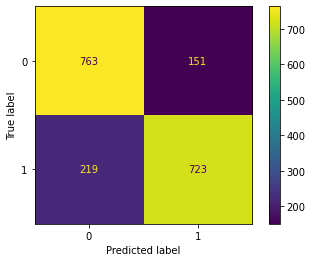

In [56]:
plot_confusion_matrix(model, X_test, y_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       914
           1       0.83      0.77      0.80       942

    accuracy                           0.80      1856
   macro avg       0.80      0.80      0.80      1856
weighted avg       0.80      0.80      0.80      1856



#### Logestic Regression 

In [ ]:
# Building the model and fitting it on training data
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

LogisticRegression()

In [59]:
# Predicting the test data output
y_pred = model_log.predict(X_test)

In [60]:
# Printing the precision and accuracy of our model
print('precision on the evaluation set: ', precision_score(y_test, y_pred))
print('accuracy on the evaluation set: ', accuracy_score(y_test, y_pred))

precision on the evaluation set:  0.8461538461538461
accuracy on the evaluation set:  0.8125


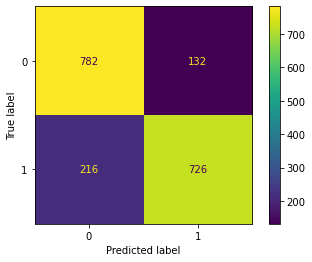

In [61]:
plot_confusion_matrix(model_log, X_test, y_test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       914
           1       0.85      0.77      0.81       942

    accuracy                           0.81      1856
   macro avg       0.81      0.81      0.81      1856
weighted avg       0.82      0.81      0.81      1856



#### KNN

In [64]:
knn = KNeighborsClassifier(n_neighbors=23)

In [65]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [66]:
pred_knn = knn.predict(X_test)

In [67]:
print('precision on the evaluation set: ', precision_score(y_test, pred_knn))
print('accuracy on the evaluation set: ', accuracy_score(y_test, pred_knn))

precision on the evaluation set:  0.825925925925926
accuracy on the evaluation set:  0.7769396551724138


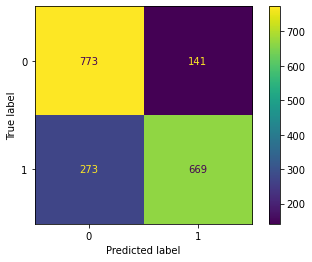

In [68]:
plot_confusion_matrix(knn, X_test, y_test)

In [69]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       914
           1       0.83      0.71      0.76       942

    accuracy                           0.78      1856
   macro avg       0.78      0.78      0.78      1856
weighted avg       0.78      0.78      0.78      1856



##### Random Forest

In [70]:
rfc = RandomForestClassifier(n_estimators=75)

In [71]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=75)

In [72]:
pred1 = rfc.predict(X_test)

In [73]:
print('precision on the evaluation set: ', precision_score(y_test, pred1))
print('accuracy on the evaluation set: ', accuracy_score(y_test, pred1))

precision on the evaluation set:  0.8070907194994786
accuracy on the evaluation set:  0.8098060344827587


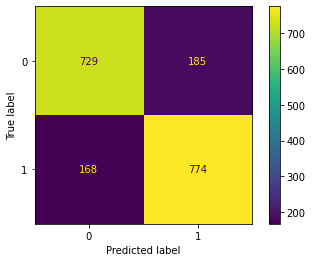

In [74]:
plot_confusion_matrix(rfc, X_test, y_test)

In [75]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       914
           1       0.81      0.82      0.81       942

    accuracy                           0.81      1856
   macro avg       0.81      0.81      0.81      1856
weighted avg       0.81      0.81      0.81      1856

